# **Final Project**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Project/vehicle_detection_dataset/

/content/drive/MyDrive/Project/vehicle_detection_dataset


In [ ]:
!unzip vehicle_detection_dataset.zip -d /content

Streaming output truncated to the last 5000 lines.
  inflating: /content/vehicle_detection_dataset/train/labels/img038_JPG_jpg.rf.71aa84dc169dd265dfb9bdd5b5fa7457.txt  
  inflating: /content/vehicle_detection_dataset/train/labels/img039_jpg.rf.982c9cad5835884c274f27e535a0721d.txt  
  inflating: /content/vehicle_detection_dataset/train/labels/img039_JPG_jpg.rf.e8bce524799ee38803a0d4606c3d80a0.txt  
  inflating: /content/vehicle_detection_dataset/train/labels/img040_JPG_jpg.rf.673fa0a51f15ed10ea6f030f339bfcd0.txt  
  inflating: /content/vehicle_detection_dataset/train/labels/img040_JPG_jpg.rf.847c5a59af9c4c71d32b5bfd5f6ea078.txt  
  inflating: /content/vehicle_detection_dataset/train/labels/img041_JPG_jpg.rf.21dcaf732b07cf7c3cca3547d52b652a.txt  
  inflating: /content/vehicle_detection_dataset/train/labels/img041_JPG_jpg.rf.dcb90d45e73d986f39b2ef25a5114e25.txt  
  inflating: /content/vehicle_detection_dataset/train/labels/img042_JPG_jpg.rf.15827f509dd5753686e2320e8f12560e.txt  
  inflati

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
for img in os.listdir('train/images')[:10]:
  path = f'train/images/{img}'
  img_read = plt.imread(path)
  plt.imshow(img_read)
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

# **Draw the bounding boxes on the images**

In [ ]:
# read the txt file
# It will read a single file
def parse_yolo_annotation(annotation_path):
  with open(annotation_path, 'r') as file:
    lines = file.read().split('\n')
    annotations = []
    for line in lines:
      if line.strip() != "":
        data = line.split()  # default spit -> on the basis of space
        class_id = int(data[0])
        x,y,w,h = map(float, data[1:])
        var_dict = {'class_id':class_id, 'x':x, 'y':y, 'w':w, 'h':h}
        annotations.append(var_dict)
  return annotations


{'class_id': 5, 'x': 0.5012019230769231, 'y': 0.5, 'w': 0.9975961538461539, 'h': 1.0}
1 0 416 416


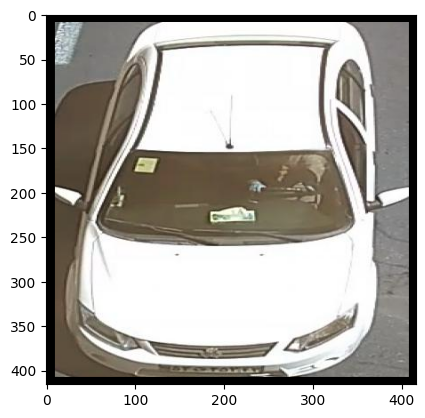

{'class_id': 5, 'x': 0.5072115384615384, 'y': 0.5, 'w': 0.9855769230769231, 'h': 1.0}
5 0 416 416


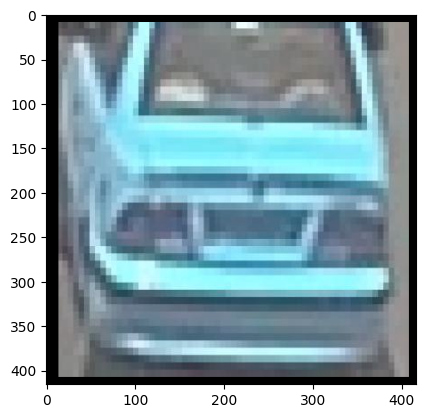

{'class_id': 5, 'x': 0.5, 'y': 0.5, 'w': 1.0, 'h': 1.0}
0 0 416 416


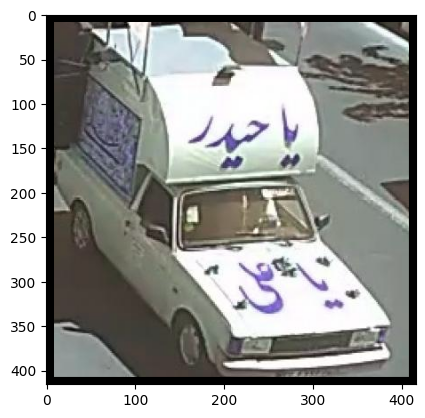

{'class_id': 5, 'x': 0.5036057692307693, 'y': 0.5, 'w': 0.9915865384615384, 'h': 1.0}
3 0 415 416


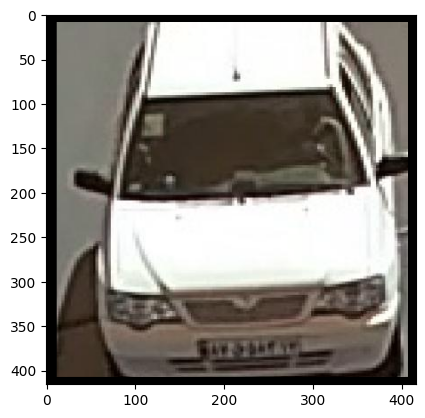

{'class_id': 6, 'x': 0.5, 'y': 0.5, 'w': 1.0, 'h': 1.0}
0 0 416 416


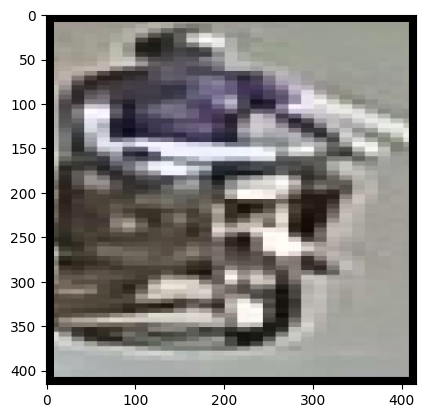

{'class_id': 5, 'x': 0.5, 'y': 0.5168269230769231, 'w': 1.0, 'h': 0.9651442307692307}
0 14 416 415


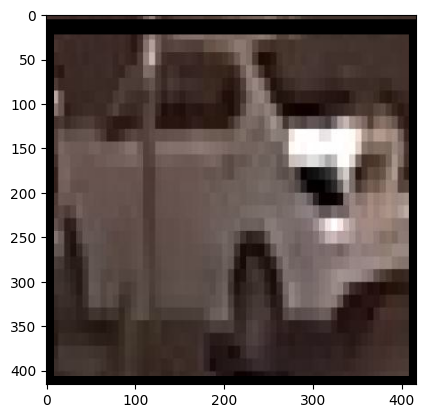

{'class_id': 5, 'x': 0.5060096153846154, 'y': 0.5, 'w': 0.9879807692307693, 'h': 1.0}
5 0 416 416


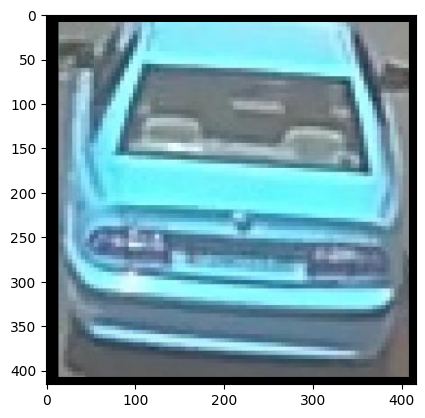

{'class_id': 5, 'x': 0.5, 'y': 0.5036057692307693, 'w': 1.0, 'h': 0.9915865384615384}
0 3 416 415


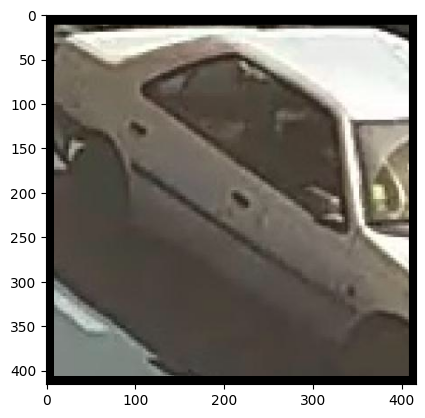

{'class_id': 5, 'x': 0.5, 'y': 0.5, 'w': 1.0, 'h': 1.0}
0 0 416 416


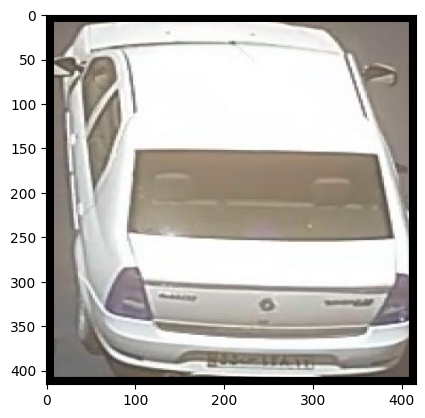

{'class_id': 5, 'x': 0.5036057692307693, 'y': 0.5, 'w': 0.9927884615384616, 'h': 1.0}
3 0 416 416


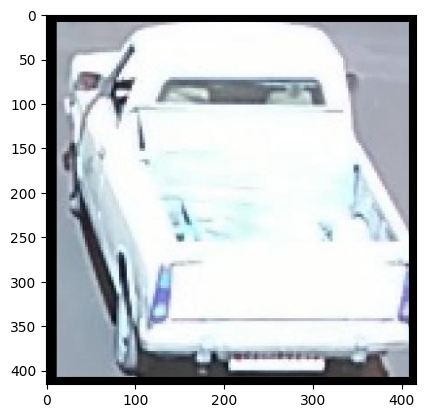

In [ ]:
import cv2
import os
data_dir = 'valid'
image_files = [f for f in os.listdir(f'{data_dir}/images')[:10] if f.endswith('.jpg')]

for image_file in image_files:
  img_path = f'valid/images/{image_file}'
  image = cv2.imread(img_path)

  annotation_path = f'valid/labels/{image_file[:-4]}.txt'
  annotations = parse_yolo_annotation(annotation_path)


  class_color = {
    0: (0,255,0),
    1: (0, 0 , 255)
  }

  for annotation in annotations:
    print(annotation)
    class_id = annotation['class_id']
    x = annotation['x']
    y = annotation['y']
    w = annotation['w']
    h = annotation['h']

    color = class_color.get(class_id, (0,0,0))

    img_h, img_w, channel = image.shape

    x1 = int((x - w/2) * img_w)
    y1 = int((y - h/2) * img_h)

    x2 = int((x + w/2) * img_w)
    y2 = int((y + h/2) * img_h)

    print(x1, y1, x2, y2)


    image = cv2.rectangle(image, (x1, y1),(x2, y2), color, 15)

  plt.imshow(image)
  plt.show()

## **Training the model**

In [ ]:
import yaml

data_yaml = dict(train =  '/content/drive/MyDrive/Project/vehicle_detection_dataset/train',
    val = '/content/drive/MyDrive/Project/vehicle_detection_dataset/valid',
    nc = 15,
    names = ['Ambulance', 'Auto', 'Bicycle', 'Bike', 'Bus', 'Car', 'Motorcycle', 'Truck',
             'auto-rickshaw', 'bus', 'car', 'lorry', 'mini truck', 'small-motorcycle', 'small-truck'])


with open('vehicle_data.yaml', 'w') as file:
  yaml.dump(data_yaml, file)




In [ ]:
import glob

image_files = [f for f in os.listdir('/content/vehicle_detection_dataset/train/images') if f.endswith('.jpg')]
label_files = [f for f in os.listdir('/content/vehicle_detection_dataset/train/labels') if f.endswith('.txt')]

missing_labels = set(image_files) - set(label_files)
if missing_labels:
    print(f"Missing label files for images: {missing_labels}")

# Verify that class labels match the specified classes
# Assuming you have a class_names list in your configuration
label_files = glob.glob('content/vehicle_detection_dataset/labels/*.txt')

for label_file in label_files:
    with open(label_file, 'r') as file:
        lines = file.read().split('\n')
        for line in lines:
            if line.strip() != "":
                data = line.split()
                class_id = int(data[0])
                if class_id not in range(len(class_names)):
                    print(f"Invalid class ID in file {label_file}: {class_id}")

Missing label files for images: {'img20_jpg.rf.73b63732ec376f6058a46e07ce2b1aa7.jpg', '160_jpg.rf.d54d3f2d7ea3c6af99de1dccea34ecdc.jpg', '7_jpg.rf.7368e4a4ba2a5efd5dabcce1e7e8fa44.jpg', 'VID-20220602-WA0028_mp4-26_jpg.rf.a624eaa0402f4143b0f37cb1233c9070.jpg', 'VID-20220602-WA0028_mp4-14_jpg.rf.cfbb8c5cb0f651cb4cc6ef8de7ffa461.jpg', 'img51_jpg.rf.4675ec56284f4390a4d0fe2f18671cf3.jpg', 'VID-20220602-WA0028_mp4-30_jpg.rf.2c6a4776ac4141083e6a745430e7ef22.jpg', 'img275_jpg.rf.eb0645af3aecdd347cf9935b0b561586.jpg', 'img435_jpg.rf.fb97f5c033a05477737244e6d89d5ba1.jpg', '254_jpg.rf.9f6b62972b94dc4ff560ae1b93c4d664.jpg', 'img970_jpg.rf.04ca09bdae519d5a36dac766a3d6df5a.jpg', 'image39_jpg.rf.76f850053b4b96a1249abe4bec4a91a7.jpg', 'img667_jpg.rf.9d53c6e9bba8347c5902362935beef81.jpg', '31Ambulance_jpg.rf.fe4da1274c83e63f2a423fb27a241d2a.jpg', 'img443_jpg.rf.984e8c772ac02ec909ba0e13e5396483.jpg', '493_jpg.rf.8cc767cc8d0f80d1bd7c3349d1a03627.jpg', 'img-159_PNG_jpg.rf.1ec69a3f1219795c80dda2a5e45e66d2.

In [ ]:
!pip install ultralytics

In [ ]:
!pip install -U yolov8


In [ ]:
!yolo detect train data=vehicle_data.yaml model=yolov8s.pt epochs=10 imgsz=640

Streaming output truncated to the last 5000 lines.
train: WARNING ⚠️ /content/drive/MyDrive/Project/vehicle_detection_dataset/train/images/530_jpg.rf.4f9d6775500ee7e40f48729da4a17d89.jpg: ignoring corrupt image/label: Label class 5 exceeds dataset class count 1. Possible class labels are 0-0
train: WARNING ⚠️ /content/drive/MyDrive/Project/vehicle_detection_dataset/train/images/530_jpg.rf.6c5f60df29f7987f3f79f3b14871977e.jpg: ignoring corrupt image/label: Label class 6 exceeds dataset class count 1. Possible class labels are 0-0
train: WARNING ⚠️ /content/drive/MyDrive/Project/vehicle_detection_dataset/train/images/530_jpg.rf.816212b26371cd7d90d9859013b01360.jpg: ignoring corrupt image/label: Label class 5 exceeds dataset class count 1. Possible class labels are 0-0
train: WARNING ⚠️ /content/drive/MyDrive/Project/vehicle_detection_dataset/train/images/530_jpg.rf.a21e979216ac2d4038b08717e95610a4.jpg: ignoring corrupt image/label: Label class 5 exceeds dataset class count 1. Possible cl

In [ ]:
!yolo predict model=/content/drive/MyDrive/Project/vehicle_detection_dataset/runs/detect/train3/weights/best.pt imgsz=640 conf=0.25


WARNING ⚠️ 'source' is missing. Using default 'source=/usr/local/lib/python3.10/dist-packages/ultralytics/assets'.
Ultralytics YOLOv8.0.212 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11131389 parameters, 0 gradients, 28.5 GFLOPs

image 1/2 /usr/local/lib/python3.10/dist-packages/ultralytics/assets/bus.jpg: 640x480 1 Ambulance, 545.9ms
image 2/2 /usr/local/lib/python3.10/dist-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 416.0ms
Speed: 8.0ms preprocess, 481.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
import os

# Change the current working directory
os.chdir('/content/drive/MyDrive/Project/vehicle_detection_dataset/runs/detect/predict')

# Load a pretrained YOLOv8n model
model = YOLO('yolov8n.pt')

# Run inference on an image
results = model(['bus.jpg', 'zidane.jpg'])


0: 640x640 4 persons, 1 bus, 1: 640x640 2 persons, 1 tie, 495.2ms
Speed: 3.9ms preprocess, 247.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


**Training the model to detect vehicles in a video and count the number of vehicles on the road in live or recorded video in real-time. OpenCV will save your life here.**

In [ ]:
!pip install ultralytics -q

In [ ]:
!pip3 install torch torchvision torchaudio

In [ ]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import subprocess
from tqdm.notebook import tqdm
from IPython.display import Video, display
%matplotlib inline

path = 'https://docs.google.com/uc?export=download&confirm=&id=1pz68D1Gsx80MoPg-_q-IbEdESEmyVLm-'




In [ ]:
vdo_frac = 0.65
display(Video(data=path, height=int(720*vdo_frac), width=int(1280*vdo_frac)))

In [ ]:
model = YOLO('yolov8x.pt')
dict_classes = model.model.names

100%|██████████| 131M/131M [00:00<00:00, 140MB/s]


In [ ]:
def resize_frame(frame, percent_scale):
    width = int(frame.shape[1] * percent_scale / 100)
    height = int(frame.shape[0] * percent_scale / 100)
    dim = (width, height)
    resized = cv2.resize(frame, dim, interpolation=cv2.INTER_AREA)
    return resized

In [ ]:
verbose = False
percent_scale = 50
video = cv2.VideoCapture(path)
class_IDS = [2, 3, 5, 7]
veiculos_contador_in = dict.fromkeys(class_IDS, 0)
veiculos_contador_out = dict.fromkeys(class_IDS, 0)
frames_list = []
cy_linha = int(1500 * percent_scale / 100)
cx_sentido = int(2000 * percent_scale / 100)
offset = int(8 * percent_scale / 100)
contador_in = 0
contador_out = 0
print(f'[INFO] - Verbose during Prediction: {verbose}')

# Original information of the video
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
fps = video.get(cv2.CAP_PROP_FPS)
print('[INFO] - Original Dim: ', (width, height))

# Scaling Video for better performance
if percent_scale != 100:
    print('[INFO] - Scaling change may cause errors in pixels lines ')
    width = int(width * percent_scale / 100)
    height = int(height * percent_scale / 100)
    print('[INFO] - Dim Scaled: ', (width, height))
    video_name = 'result.mp4'
output_path = "rep_" + video_name
tmp_output_path = "tmp_" + output_path
VIDEO_CODEC = "MP4V"
output_video = cv2.VideoWriter(tmp_output_path,
                               cv2.VideoWriter_fourcc(*VIDEO_CODEC),
                               fps, (width, height))

for i in tqdm(range(int(video.get(cv2.CAP_PROP_FRAME_COUNT)))):
    # Reading frame from video
    _, frame = video.read()
    # Applying resizing of read frame
    frame = resize_frame(frame, percent_scale)

    if verbose:
        print('Dimension Scaled(frame): ', (frame.shape[1], frame.shape[0]))

    # Get the predictions
    y_hat = model.predict(frame, conf=0.7, classes=class_IDS, device='cpu', verbose=False)

    # Getting the bounding boxes, confidence, and classes of the recognized objects in the current frame.
    boxes = y_hat[0].boxes.xyxy.cpu().numpy()
    conf = y_hat[0].boxes.conf.cpu().numpy()
    classes = y_hat[0].boxes.cls.cpu().numpy()



[INFO] - Verbose during Prediction: False
[INFO] - Original Dim:  (3840, 2160)
[INFO] - Scaling change may cause errors in pixels lines 
[INFO] - Dim Scaled:  (1920, 1080)


  0%|          | 0/538 [00:00<?, ?it/s]

In [ ]:
# Storing the above information in a dataframe
positions_frame = pd.DataFrame(y_hat[0].cpu().numpy().boxes.xyxy, columns=['xmin', 'ymin', 'xmax', 'ymax'])
positions_frame['conf'] = y_hat[0].cpu().numpy().boxes.conf
positions_frame['class'] = y_hat[0].cpu().numpy().boxes.cls

# Translating the numeric class labels to text
labels = [dict_classes[i] for i in classes]

    # Drawing transition line for in\out vehicles counting
cv2.line(frame, (0, cy_linha), (int(4500 * percent_scale / 100), cy_linha), (255, 255, 0), 8)

# For each vehicle, draw the bounding-box and count each one passing through the transition line (in\out)
for ix, row in enumerate(positions_frame.iterrows()):
    # Getting the coordinates of each vehicle (row)
    xmin, ymin, xmax, ymax, conf, category, = row[1].astype('int')


In [ ]:
# Calculating the center of the bounding-box
center_x, center_y = int((xmax + xmin) / 2), int((ymax + ymin) / 2)

# drawing center and bounding-box of the vehicle in the given frame
cv2.rectangle(frame, (xmin, ymin), (xmax, ymax), (255, 0, 0), 5)  # box
cv2.circle(frame, (center_x, center_y), 5, (255, 0, 0), -1)  # center of box

# Drawing above the bounding-box the name of the class recognized.
#cv2.putText(img=frame, text=labels[ix] + ' - ' + str(np.round(conf[ix], 2)),
     #           org=(xmin, ymin - 10), fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=1, color=(255, 0, 0), thickness=2)
cv2.putText(img=frame, text=labels[ix] + ' - ' + str(np.round(conf, 2)),
            org=(xmin, ymin - 10), fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=1, color=(255, 0, 0), thickness=2)

# Checking if the center of the recognized vehicle is in the area given by the transition line + offset and transition line - offset
if (center_y < (cy_linha + offset)) and (center_y > (cy_linha - offset)):
        if (center_x >= 0) and (center_x <= cx_sentido):
            contador_in += 1
            veiculos_contador_in[category] += 1
        else:
            contador_out += 1
            veiculos_contador_out[category] += 1

In [ ]:
# Updating the counting type of vehicle
contador_in_plt = [f'{dict_classes[k]}: {i}' for k, i in veiculos_contador_in.items()]
contador_out_plt = [f'{dict_classes[k]}: {i}' for k, i in veiculos_contador_out.items()]

    # Drawing the number of vehicles in\out
cv2.putText(img=frame, text='N. vehicles In',
                org=(30, 30), fontFace=cv2.FONT_HERSHEY_TRIPLEX,
                fontScale=1, color=(255, 255, 0), thickness=1)

cv2.putText(img=frame, text='N. vehicles Out',
                org=(int(2800 * percent_scale / 100), 30),
                fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=1, color=(255, 255, 0), thickness=1)
# Drawing the counting of the type of vehicles in the corners of the frame
xt = 40
for txt in range(len(contador_in_plt)):
        xt += 30
        cv2.putText(img=frame, text=contador_in_plt[txt],
                    org=(30, xt), fontFace=cv2.FONT_HERSHEY_TRIPLEX,
                    fontScale=1, color=(255, 255, 0), thickness=1)
        cv2.putText(img=frame, text=contador_out_plt[txt],
                    org=(int(2800 * percent_scale/ 100), xt), fontFace=cv2.FONT_HERSHEY_TRIPLEX,
                    fontScale=1, color=(255, 255, 0), thickness=1)

In [ ]:
 # Drawing the number of vehicles in\out
cv2.putText(img=frame, text=f'In:{contador_in}',
                org=(int(1820 * percent_scale / 100), cy_linha + 60),
                fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=1, color=(255, 255, 0), thickness=2)
cv2.putText(img=frame, text=f'Out:{contador_out}',
                org=(int(1800 * percent_scale / 100), cy_linha - 40),
                fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=1, color=(255, 255, 0), thickness=2)

if verbose:
        print(contador_in, contador_out)

    # Saving frames in a list
frames_list.append(frame)
    # Saving transformed frames in an output video format
output_video.write(frame)

In [ ]:
# Releasing the video
output_video.release()
# Post-processing
    # Fixing video output codec to run in the notebook\browser
if os.path.exists(output_path):
   os.remove(output_path)

subprocess.run(
       ["ffmpeg", "-i", tmp_output_path, "-crf", "18", "-preset", "veryfast", "-hide_banner", "-loglevel", "error",
        "-vcodec", "libx264", output_path])
os.remove(output_path)

In [ ]:
# Display frames
indices_to_display = [28, 29, 32, 40, 42, 50, 58]
for i in indices_to_display:
    if i < len(frames_list):
        plt.figure(figsize=(10, 10))
        plt.imshow(frames_list[i])
        plt.show()
    else:
        print(f"Index {i} is out of range. Length of frames_list is {len(frames_list)}")


In [ ]:
#output video result
frac = 0.7
Video(data='rep_result.mp4', embed=True, height=int(720 * frac), width=int(1280 * frac))